#Problem Statement 2

Implement the Image classification CNN model for classifying hand-written MNIST dataset by dividing the model into following 4 stages:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.optimizers import Adam

a. Loading and preprocessing the image data

In [ ]:
# Load the training data from CSV file
train_data = pd.read_csv('train_data.csv')
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label']

# Load the testing data from CSV file
test_data = pd.read_csv('test_data.csv')
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

num_classes = 10

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 32*32*3))
x_test = x_test.reshape((-1, 32*32*3))

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

IndexError: ignored

b. Defining the model's architecture

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

c. Training the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 39s 41ms/step - loss: 0.1759 - accuracy: 0.9490 - val_loss: 0.0635 - val_accuracy: 0.9787
Epoch 2/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0581 - accuracy: 0.9823 - val_loss: 0.0508 - val_accuracy: 0.9829
Epoch 3/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0382 - accuracy: 0.9879 - val_loss: 0.0510 - val_accuracy: 0.9825
Epoch 4/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0369 - val_accuracy: 0.9871
Epoch 5/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0454 - val_accuracy: 0.9860


d. Estimating the model's performance

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.045391954481601715
Test accuracy:  0.9860000014305115


313/313 [==============================] - 5s 14ms/step
Actual Number:  0
Predicted Number:  0


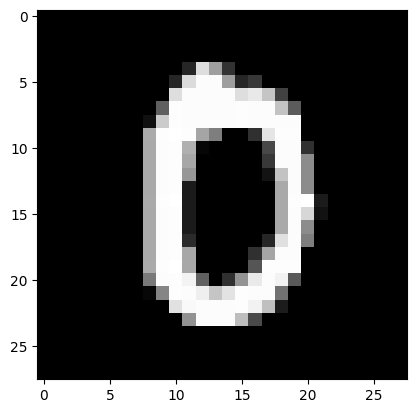

In [ ]:
import random

n = random.randint(0,9999)
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))